## Author : Samta Malik
### GRIP @ The Sparks Foundation

### Task 2 : Prediction using Supervised Machine Learning


### Problem statement: To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.



# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `score` using `hours` as a predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [77]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [79]:
# Reading data from remote link

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [80]:
df.shape

(25, 2)

In [81]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step 2: Visualising the Data




In [83]:
# Import the Matplotlib and seaborn package

import matplotlib.pyplot as plt 
import seaborn as sns

In [84]:
# plotting the correlation table

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


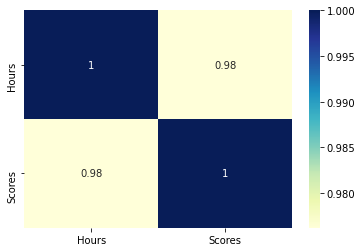

In [85]:
#plotting the heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the the heatmap, the variable `hours` seems to be highly correlated with `scores`. So let's go ahead and perform simple linear regression using `hours` as our feature variable.

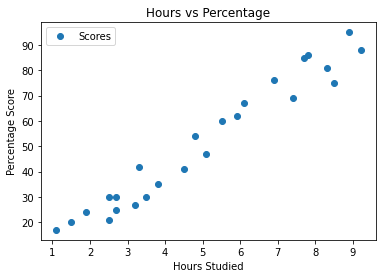

In [86]:
# Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style = 'o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score'); 

## Step 3: Performing Simple Linear Regression


Generic Steps in model building using `sklearn`. \
We first assign the feature variable, `hours`, in this case, to the variable X and the response variable, `scores`, to the variable y.


In [87]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

## Step4: Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [89]:
# Let's now take a look at the train dataset

X_train

array([[7.4],
       [6.9],
       [4.8],
       [9.2],
       [4.5],
       [3.5],
       [7.8],
       [2.5],
       [5.1],
       [2.7],
       [1.1],
       [1.9],
       [6.1],
       [3.2],
       [7.7],
       [2.5],
       [8.9],
       [5.5],
       [8.5],
       [8.3]])

In [90]:
y_train

array([69, 76, 54, 88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95,
       60, 75, 81], dtype=int64)

## Step5: Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [91]:
import statsmodels.api as sm

In [92]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 


LinearRegression()

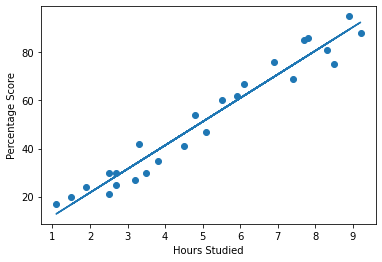

In [93]:
# Plotting the regression line

line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score');


## Step6: Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [94]:
# Predicting the scores

y_pred = lr.predict(X_test) 

In [95]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


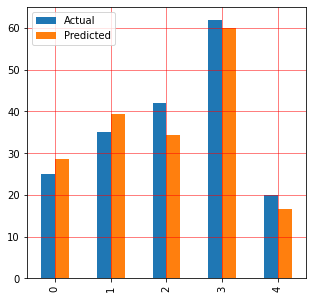

In [96]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()


In [97]:
# predicting the score if a student studies for 9.25 hours

hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.96728365185982


In [101]:
#predicting scores on random data 

#7 hours
hours = 7
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

#6 hours
hours = 6
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 7
Predicted Score = 70.83753379056344
No of Hours = 6
Predicted Score = 61.00208940776504


## Step7: Evaluation

In [99]:
# checking the accuracy of the model

from sklearn import metrics
metrics.r2_score(y_test,y_pred) ##Goodness of fit Test

0.9050356232459791

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_test, y_pred))

4.543287018366107

## Conclusion : 
*If a Student studies for 9.25 hours he would score 92.9%*